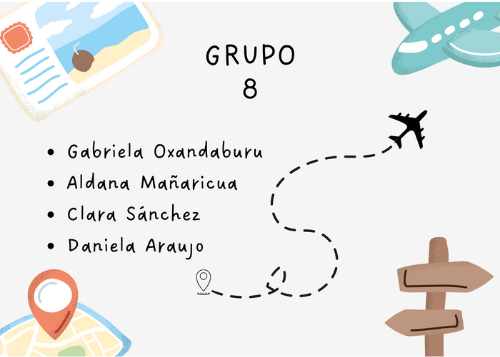

# MODELO DE APRENDIZAJE NO SUPERVISADO

### Objetivo

El objetivo es poder obtener información respecto a las preferencias de los usuarios en los vuelos de British Airlines, clasificándolos y agrupándolos segun determinadas características

***1- Importamos librerías***

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#ignorar warning para que quede mejor el notebook
import warnings
warnings.filterwarnings('ignore')

***2- Leemos el Dataset (limpio y con las variables codificadas para el análisis)***

In [10]:
df = pd.read_csv('PasajerosAerolineas_Limpio.csv')

***3- Revisamos la forma del Data set y las features***

* Tamaño

In [13]:
df.shape

(50002, 9)

* Columnas

In [15]:
df.columns

Index(['NumeroDePasajeros', 'ClientePotencial', 'Estadia', 'HorarioDelVuelo',
       'EquipajeExtra', 'AsientosPreferido', 'QuiereComidaEnVuelo',
       'DuracionDelVuelo', 'ReservaCompleta'],
      dtype='object')

* Tipo de Datos de las Variables

In [17]:
df.dtypes

NumeroDePasajeros      float64
ClientePotencial       float64
Estadia                float64
HorarioDelVuelo        float64
EquipajeExtra          float64
AsientosPreferido      float64
QuiereComidaEnVuelo    float64
DuracionDelVuelo       float64
ReservaCompleta        float64
dtype: object

***4- Elegimos un Modelo de clustering: K-MEANS***

Se eligió este Modelo ya que se busca poder clasificar, de forma eficiente, a los usuarios de la aerolínea segun diferentes caracterìsticas, con el fin de poder analizar preferencias al interior de cada uno de los grupos

***5- Seleccionamos variables para el modelo***

En la selección se tuvo en cuenta que sean variables cuantitativas, ya que al intentar hacerlo con variables categóricas (aunque previamente fueron encodeadas y escaladas) el modelo k means no funcionaba y no habia una buena clasificacion en clusters que aportaran informacion relevante.
Asimismo analizamos también la matriz de correlación para poder observar si las variables elegidas tenian correlación.


* Consideramos dos variables: Estadìa y Duración del Vuelo


In [23]:
X=df[['Estadia', 'DuracionDelVuelo']].values

***6- Metodo del Codo***

Para elegir la cantidad óptima de clusters

In [26]:
K = np.arange(1, 11)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

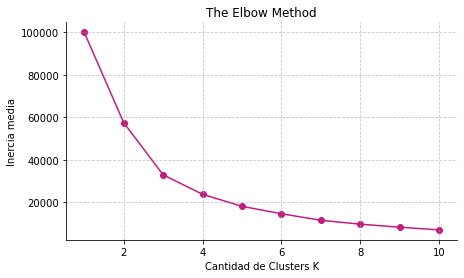

In [27]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias, c="#c51b7d")
plt.scatter(K,lista_inercias,c="#c51b7d")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('The Elbow Method')
plt.show()

Como se observa en el gráfico la cantidad óptima de clusters es de 4

***7- Modelo K-Means***                    

In [30]:
kmeansmodel = KMeans(n_clusters= 4, random_state=0)

y_kmeans= kmeansmodel.fit_predict(X)

In [31]:
kmeans = KMeans(n_clusters=4)

In [32]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [33]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2, 3], dtype=int32)

***8- Centroides***

In [35]:
centros = kmeansmodel.cluster_centers_
print(centros)

[[ 1.80005778  0.40813842]
 [-0.18955112  0.76394879]
 [-0.2757443  -1.07695779]
 [ 6.45187289  0.46448119]]


***9- Visualizamos los clusters***

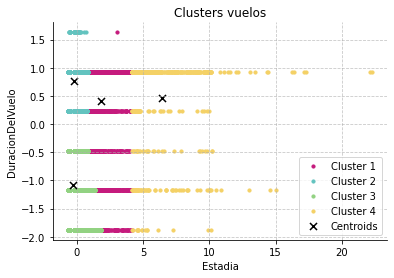

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c="#c51b7d", label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c="#63C3BF", label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c="#92D282", label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c="#F4D166", label='Cluster 4')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=50, c='black', marker='x', label='Centroids')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.7)
plt.title('Clusters vuelos')
plt.xlabel('Estadia')
plt.ylabel('DuracionDelVuelo')
plt.legend()
plt.show()

***10- Metodo Silhouette***

Calculamos el coeficiente Silhoutte para analizar la  eficiencia del Modelo

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.5934906123971415


Al obtener un Coeficiente de Silhouette de 0.59,  nos indicaría que tenemos una relativamente buena cohesión y separación entre clusters aunque no óptima.

***11- Graficamos el Coeficiente Silhouette***

In [44]:
K = np.arange(2, 6)
lista_silueta = [silhouette_score(X, KMeans(n_clusters=i, random_state=0).fit(X).labels_) for i in K]

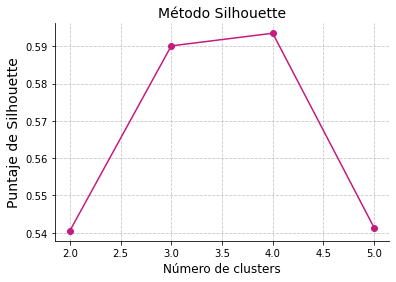

In [45]:
plt.plot(range(2, 6), lista_silueta, color="#c51b7d", marker='o', linestyle='-')
plt.title('Método Silhouette', fontsize=14)
plt.xlabel('Número de clusters', fontsize=12)
plt.ylabel('Puntaje de Silhouette', fontsize=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Al graficar el coeficiente para 2, 3, 4 y 5 clusters se corrobora que la cantidad de clusters que mejor coeficiente tiene es la de 4.

### Conclusión

Al analizar la visualización de los clusters se observa que no estan claramente definidos, se realizaron todas las modificaciones y correcciones necesarias pero se llegó a la conclusión que las características de las features del dataset impiden la realización de un modelo K- Means dado que la mayorìa de las variables son categóricas y muchas de ellas binarias. Aunque se seleccionaron variables cuantitativas, no fue suficiente para la realización de este Modelo de forma óptima donde se pudieran obtener conclusiones relevantes.
Otra situaciòn a considerar es que la Variable Estadía tiene una cantidad de outliers ya que los dias van de 1 a más de 200, y las estadías altas son poco frecuentes. El método K Means es sensible a outliers, por lo que esto tambièn podrìa haber afectado el rendimiento.
Entendemos que al ser un Dataset con datos etiquedados conviene la realización de un Modelo de Aprendizaje Supervisado, y en caso de necesitarse un Modelo No Supervisado se requeriría a la aerolíneas datos anexos que tengan las características necesarias, tales como por ejemplo: precio de los vuelos, distancia, edades de los pasajeros, entre otras que pudieran ser interesante conocer para clasificar las preferencias de los usuarios.

Como desafío a futuro también podemos mencionar la realización de un Modelo K Modes